# Explore here

Top 3 canciones de Cruz Cafuné:
                name  popularity  duration_min
0               A Mí          81          3.49
1          Te Regalo          79          2.46
2  lo que hay x aquí          77          2.58


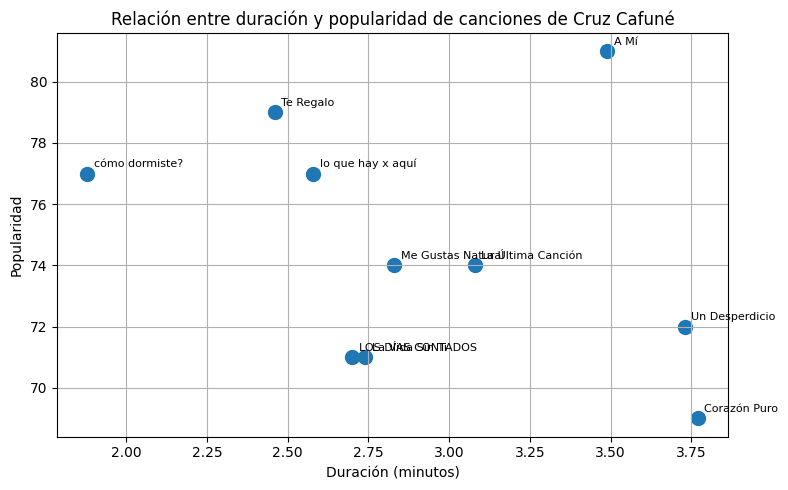

In [16]:
import os
import pandas as pd
from dotenv import load_dotenv
import spotipy
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


cruz_cafune = 'spotify:artist:2IMZYfNi21MGqxopj9fWx8'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id,
    client_secret=client_secret))
results = spotify.artist_top_tracks(cruz_cafune)

tracks_data = []

for track in results['tracks'][:10]:
    tracks_data.append({
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_min': round(track['duration_ms'] / 60000, 2)
    })

df = pd.DataFrame(tracks_data)

df_sorted = df.sort_values(by='popularity', ascending=False).reset_index(drop=True)

print("Top 3 canciones de Cruz Cafuné:")
print(df_sorted.head(3))

# Scatter plot duración vs popularidad
plt.figure(figsize=(8,5))
plt.scatter(df['duration_min'], df['popularity'], s=100)

# Añadir etiquetas para cada punto (opcional pero recomendable)
for i, row in df.iterrows():
    plt.text(row['duration_min']+0.02, row['popularity']+0.2, row['name'], fontsize=8)

plt.title('Relación entre duración y popularidad de canciones de Cruz Cafuné')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')
plt.grid(True)
plt.tight_layout()
plt.show()